In [1]:
# Importar las librerías necesarias para el análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats # Importar la librería stats para pruebas estadísticas

# Parte 4

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

`company_name`: nombre de la empresa de taxis

`trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

`dropoff_location_name`: barrios de Chicago donde finalizaron los viajes

`average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

---
Para estos dos datasets ahora necesitas

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [2]:
sql_result_01 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_01.csv"
sql_result_04 = "https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_04.csv"

# Cargar el dataset
Cargar los archivos CSV `project_sql_result_01.csv` y `project_sql_result_04.csv` en DataFrames de pandas, explorar sus estructuras, tipos de datos y estadísticas descriptivas. Luego, identificar las 10 principales compañías de taxis por número de viajes y los 10 principales barrios de destino por promedio de viajes, visualizando estos resultados con gráficos de barras y extrayendo conclusiones de cada uno, y finalmente resumir los hallazgos clave.

Cargue el archivo CSV desde `sql_result_01` en un DataFrame de pandas llamado `df_trips_companies` y mostre sus primeras 5 filas para verificar que los datos se hayan cargado correctamente.

In [3]:
df_trips_companies = pd.read_csv(sql_result_01)
df_trips_companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Cargue el archivo CSV desde la URL `sql_result_04` en un DataFrame de pandas denominado `df_trips_locations` y mostre sus primeras 5 filas para verificar que los datos se hayan cargado correctamente.



In [4]:
df_trips_locations = pd.read_csv(sql_result_04)
df_trips_locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Explorar Datos Iniciales

Mostrar las primeras filas de ambos DataFrames (`.head()`), verificar sus tipos de datos (`.info()`) y obtener un resumen estadístico descriptivo (`.describe()`) para entender la estructura y el contenido de los datos.


Se requiere mostrar los tipos de datos y las estadísticas descriptivas de ambos marcos de datos. Comenzaré con `df_trips_companies` utilizando `.info()` para comprobar los tipos de datos y `.describe()` para obtener un resumen estadístico.


In [5]:
print("Información de df_trips_companies:")
df_trips_companies.info()
print("\nEstadísticas descriptivas de df_trips_companies:")
df_trips_companies.describe()

Información de df_trips_companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estadísticas descriptivas de df_trips_companies:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Ahora mostraré los tipos de datos y las estadísticas descriptivas del DataFrame `df_trips_locations` utilizando `.info()` y `.describe()`.



In [6]:
print("Información de df_trips_locations:")
df_trips_locations.info()
print("\nEstadísticas descriptivas de df_trips_locations:")
df_trips_locations.describe()

Información de df_trips_locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estadísticas descriptivas de df_trips_locations:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Verificar y Corregir Tipos de Datos

Inspeccionar los tipos de datos de cada columna y realizar las conversiones necesarias si hay alguna columna con un tipo de dato incorrecto que pueda afectar el análisis.


### Tipos de Datos Verificados

Después de revisar los tipos de datos de ambos DataFrames con `.info()`:

- **`df_trips_companies`**:
  - `company_name`: `object` (cadena de texto), es correcto.
  - `trips_amount`: `int64` (número entero), es correcto para representar la cantidad de viajes.

- **`df_trips_locations`**:
  - `dropoff_location_name`: `object` (cadena de texto), es correcto.
  - `average_trips`: `float64` (número decimal), es correcto para representar el promedio de viajes.

No se encontraron tipos de datos incorrectos que requieran conversión. Los tipos de datos actuales son apropiados para el análisis posterior.

# Identificar las 10 Principales Compañías de Taxis

Identificar las 10 principales compañías de taxis en términos de `trips_amount` del dataset `project_sql_result_01.csv`.


Para identificar las 10 principales compañías de taxis, necesito ordenar el DataFrame `df_trips_companies` por 'trips_amount' en orden descendente y luego seleccionar las primeras 10 entradas.



In [7]:
top_10_companies = df_trips_companies.sort_values(by='trips_amount', ascending=False).head(10)
print("Las 10 principales compañías de taxis por número de viajes:")
print(top_10_companies)

Las 10 principales compañías de taxis por número de viajes:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


## Visualizar Empresas de Taxis y Número de Viajes

Crear un gráfico de barras para visualizar las 10 principales compañías de taxis y el número de viajes que realizaron, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.


Se requiere visualizar las 10 principales empresas de taxis por número de viajes. Utilizaré `seaborn.barplot` para crear un gráfico de barras a partir del DataFrame `top_10_companies`, asegurándome de que las etiquetas, el título y la rotación del eje x sean adecuados para facilitar la lectura.



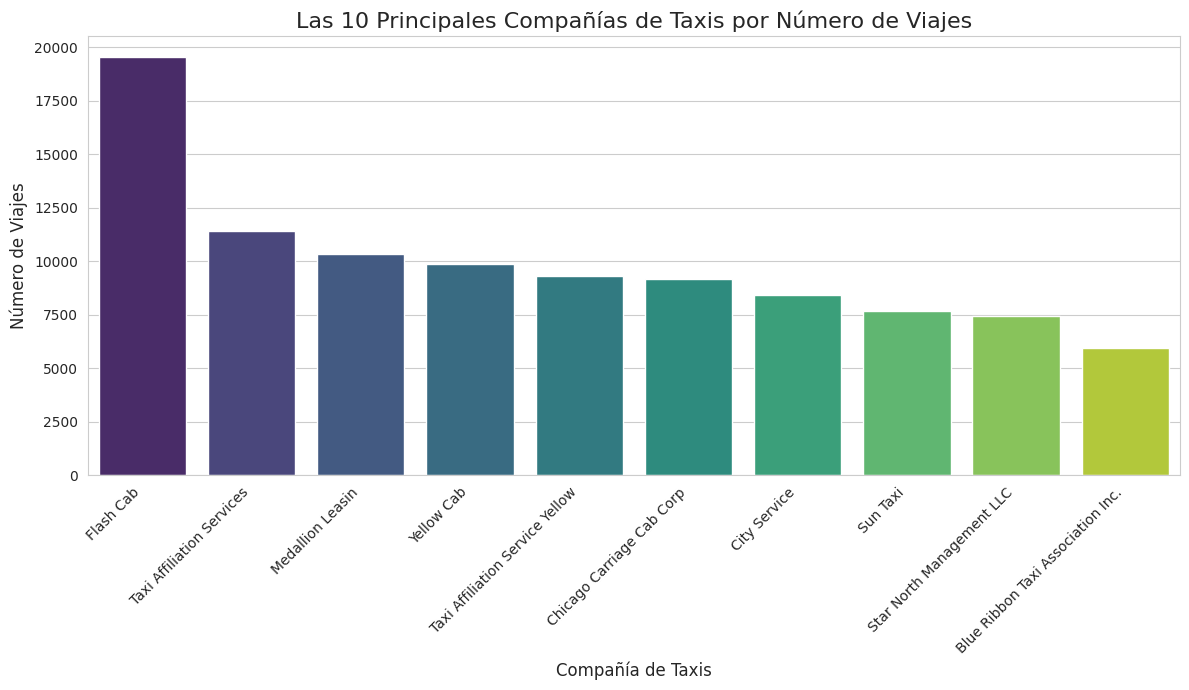

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.barplot(x='company_name', y='trips_amount', data=top_10_companies, palette='viridis', hue='company_name')
plt.title('Las 10 Principales Compañías de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Compañía de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de las 10 Principales Compañías de Taxis

El gráfico muestra la distribución de viajes entre las 10 compañías de taxis más activas. Se pueden ver estas conclusiones:

1.  **Flash Cab** es la empresa de taxis que más viaja, muchísimo más que las demás. Esto muestra que tienen una gran presencia en el mercado y probablemente más clientes o una mejor forma de conseguirlos.
2.  Las cinco primeras empresas (Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab y Taxi Affiliation Service Yellow) concentran la mayoría de los viajes, lo que indica una alta concentración del mercado.
3.  El mercado es oligopólico, con pocos actores dominando la mayoría de los viajes y un grupo más grande de compañías más pequeñas compitiendo por el resto.

El mercado de taxis lo lideran unas pocas grandes compañías, siendo Flash Cab la más destacada. Cualquier análisis o estrategia futura debería considerar su fuerte influencia.

# Identificar los 10 Principales Barrios de Destino

Identificar los 10 principales barrios (`dropoff_location_name`) con el mayor `average_trips` del dataset `project_sql_result_04.csv`.


Para identificar las 10 ubicaciones con mayor número de bajadas, necesito ordenar el DataFrame `df_trips_locations` por `average_trips` en orden descendente y, a continuación, seleccionar las primeras 10 entradas.


In [10]:
top_10_locations = df_trips_locations.sort_values(by='average_trips', ascending=False).head(10)
print("Las 10 principales ubicaciones de destino por promedio de viajes:")
print(top_10_locations)

Las 10 principales ubicaciones de destino por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Visualizar los 10 Principales Barrios de Destino

Crear un gráfico de barras para visualizar los 10 principales barrios de destino y su promedio de viajes, incluyendo leyendas y etiquetas claras. Proporcionar conclusiones basadas en este gráfico.

La subtarea requiere visualizar las 10 ubicaciones principales de entrega por promedio de viajes. Utilizaré `seaborn.barplot` para crear un gráfico de barras a partir del DataFrame `top_10_locations`, asegurándome de que las etiquetas, el título y la rotación del eje x sean adecuados para facilitar la lectura, de forma similar a la visualización anterior.


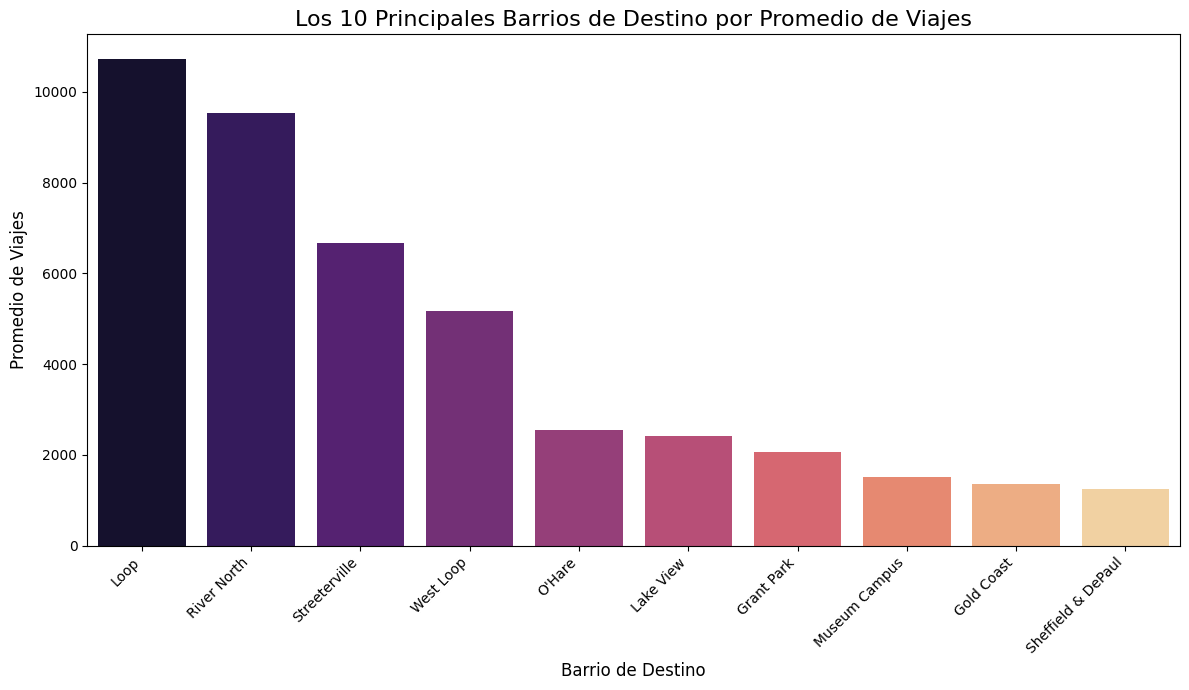

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_locations, palette='magma', hue='dropoff_location_name', legend=False)
plt.title('Los 10 Principales Barrios de Destino por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrio de Destino', fontsize=12)
plt.ylabel('Promedio de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusión del Gráfico de los 10 Principales Barrios de Destino

El gráfico muestra los 10 barrios de destino con más viajes de taxi. Estas son las conclusiones principales:

1.  Los barrios del Loop y River North son los que tienen más viajes. Estas áreas son centros de negocios, distritos financieros, centros comerciales y destinos turísticos importantes en Chicago, lo que explica la alta demanda de transporte.
2.  Los barrios de Streeterville, Grant Park y Museum Campus son también destinos turísticos y recreativos. Hay hoteles de lujo, atracciones, museos y parques populares. Hay un flujo constante de visitantes que usan taxis.
3.  Los centros de transporte son importantes porque el aeropuerto de O'Hare (Aeropuerto Internacional O'Hare) es significativo. Es un aeropuerto importante para los residentes, turistas y viajeros de negocios porque es un punto de origen y destino para viajes en taxi.
4.  Hay una gran diferencia en el número de viajes entre los barrios principales. El Loop y River North tienen más de 9000 viajes, pero barrios como Gold Coast y Sheffield & DePaul tienen menos de 1300. Esto muestra que la demanda está concentrada en unas pocas zonas.
5.  Los datos muestran que los viajes en taxi dependen mucho de la economía, el turismo y el ocio. Los sitios con más taxis son los que tienen más oficinas, tiendas y atracciones.

# Resumen de las conclusiones

Resumir las conclusiones clave de los análisis y gráficos realizados para ambos datasets.


### Análisis de datos: conclusiones principales

*   **Carga y estructura de los datos**: Se cargaron correctamente dos conjuntos de datos: `df_trips_companies` (64 entradas, 2 columnas) y `df_trips_locations` (94 entradas, 2 columnas). No se encontraron valores faltantes y todos los tipos de datos eran adecuados para el análisis.
*   **Distribución muy sesgada de los viajes**: Ambos conjuntos de datos mostraron distribuciones muy sesgadas:
    *   En el caso de las empresas de taxis, el `trips_amount` tenía una media de aproximadamente 2145,48, pero una mediana de solo 178,50, lo que indica que unas pocas empresas gestionan un número desproporcionadamente alto de viajes.
    *   En cuanto a los lugares de destino, `average_trips` mostró una media de 599,95 y una mediana de 52,02, lo que sugiere que un pequeño número de lugares atraen un número medio significativamente mayor de viajes en taxi.
*   **Dominio en el mercado de las empresas de taxis**:
    * **Flash Cab** es la empresa de taxis líder, superando significativamente a todas las demás en términos de **trips_amount**.
    * Las cinco principales empresas ("Flash Cab" , "Taxi Affiliation Services", "Medallion Leasing", "Yellow Cab" y "Taxi Affiliation Service Yellow") concentran una gran parte del total de viajes, lo que indica una estructura de mercado muy concentrada, posiblemente oligopolística.
*   **Puntos clave de entrega de llaves**:
    * "Loop" (con un promedio de 10 727,47 viajes) y "River North" (con un promedio de 9523,67 viajes) son los principales destinos de los viajes en taxi, lo que destaca su importancia como centros urbanos y de negocios.
    * Otros destinos importantes son las zonas turísticas y recreativas como «Streeterville» (6664,67 viajes de media) y «Grant Park» (2068,57 viajes de media), así como los principales centros de transporte, como «O'Hare» (2546,67 viajes de media).
    * La demanda de servicios de taxi se concentra en gran medida en estas pocas áreas clave, impulsada en gran parte por actividades económicas, turísticas y de ocio.


# Parte 5
/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

`start_ts`: fecha y hora de la recogida

`weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje

`duration_seconds`: duración del viaje en segundos

---
Prueba la hipótesis:

> "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

* cómo planteaste las hipótesis nula y alternativa
* qué criterio usaste para probar las hipótesis y por qué

In [20]:
sql_result_07 = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_8/project_sql_result_07.csv'